In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from sklearn.manifold import Isomap
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv("../../input/digit_recognizer/train.csv")
test_data = pd.read_csv("../../input/digit_recognizer/test.csv")
print(train_data.shape,test_data.shape)

(42000, 785) (28000, 784)


In [3]:
print(train_data.isnull().any().sum())
print(test_data.isnull().any().sum())

0
0


In [4]:
# 換成numpy陣列
train = train_data.to_numpy()
train_X = train[:,1:]
train_y = train[:,0:1]
test = test_data.to_numpy()

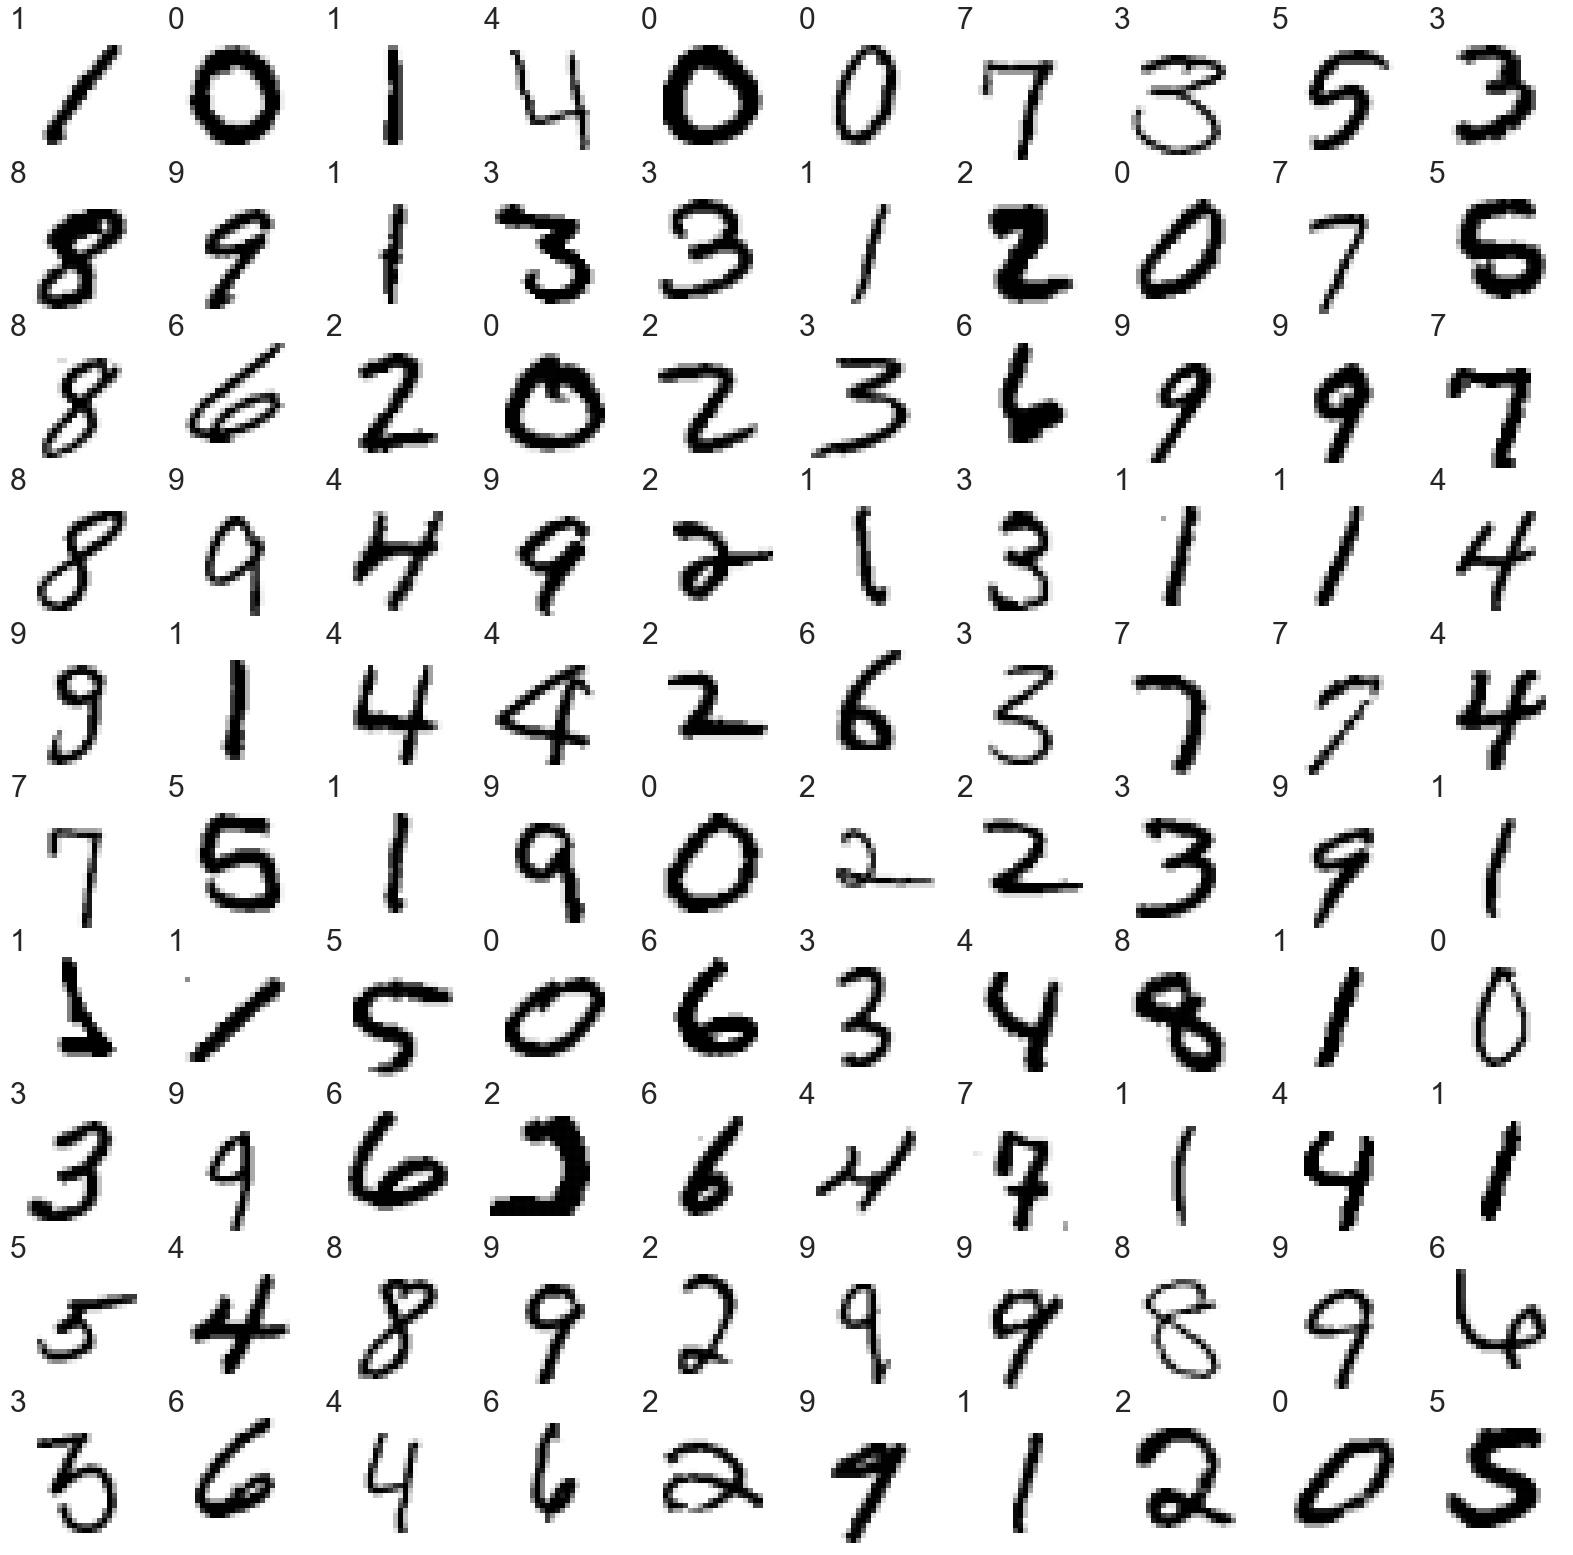

In [7]:
# 手寫圖像顯示
fig , ax = plt.subplots(10,10,figsize=(28,28),subplot_kw={"xticks":[],"yticks":[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i , axi in enumerate(ax.flat):
    axi.imshow(train_X[i].reshape(28,28),cmap="gist_gray_r")
    axi.text(0.1,0.1,int(train_y[i]),fontsize=30)

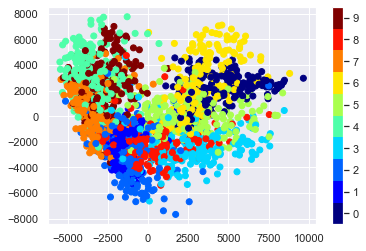

In [8]:
# 降至2維顯示字元的方位
isomap = Isomap(n_components=2)
proj = isomap.fit_transform(train_X[::20])
plt.scatter(proj[:,0],proj[:,1],c=train_y[::20],cmap=plt.cm.get_cmap("jet",10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

In [10]:
# 隨機森林分類/使用train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(train_X,np.ravel(train_y),random_state=0,test_size=0.2)
model = RandomForestClassifier(n_estimators=100,oob_score=True)
model.fit(Xtrain,ytrain)
pred1 = model.predict(Xtest)
print("accuracy score: {}".format((accuracy_score(ytest,pred1)).round(5)*100),"%")
print("OOB score: {}".format((model.oob_score_).round(5)*100),"%")

accuracy score: 96.333 %
OOB score: 95.943 %


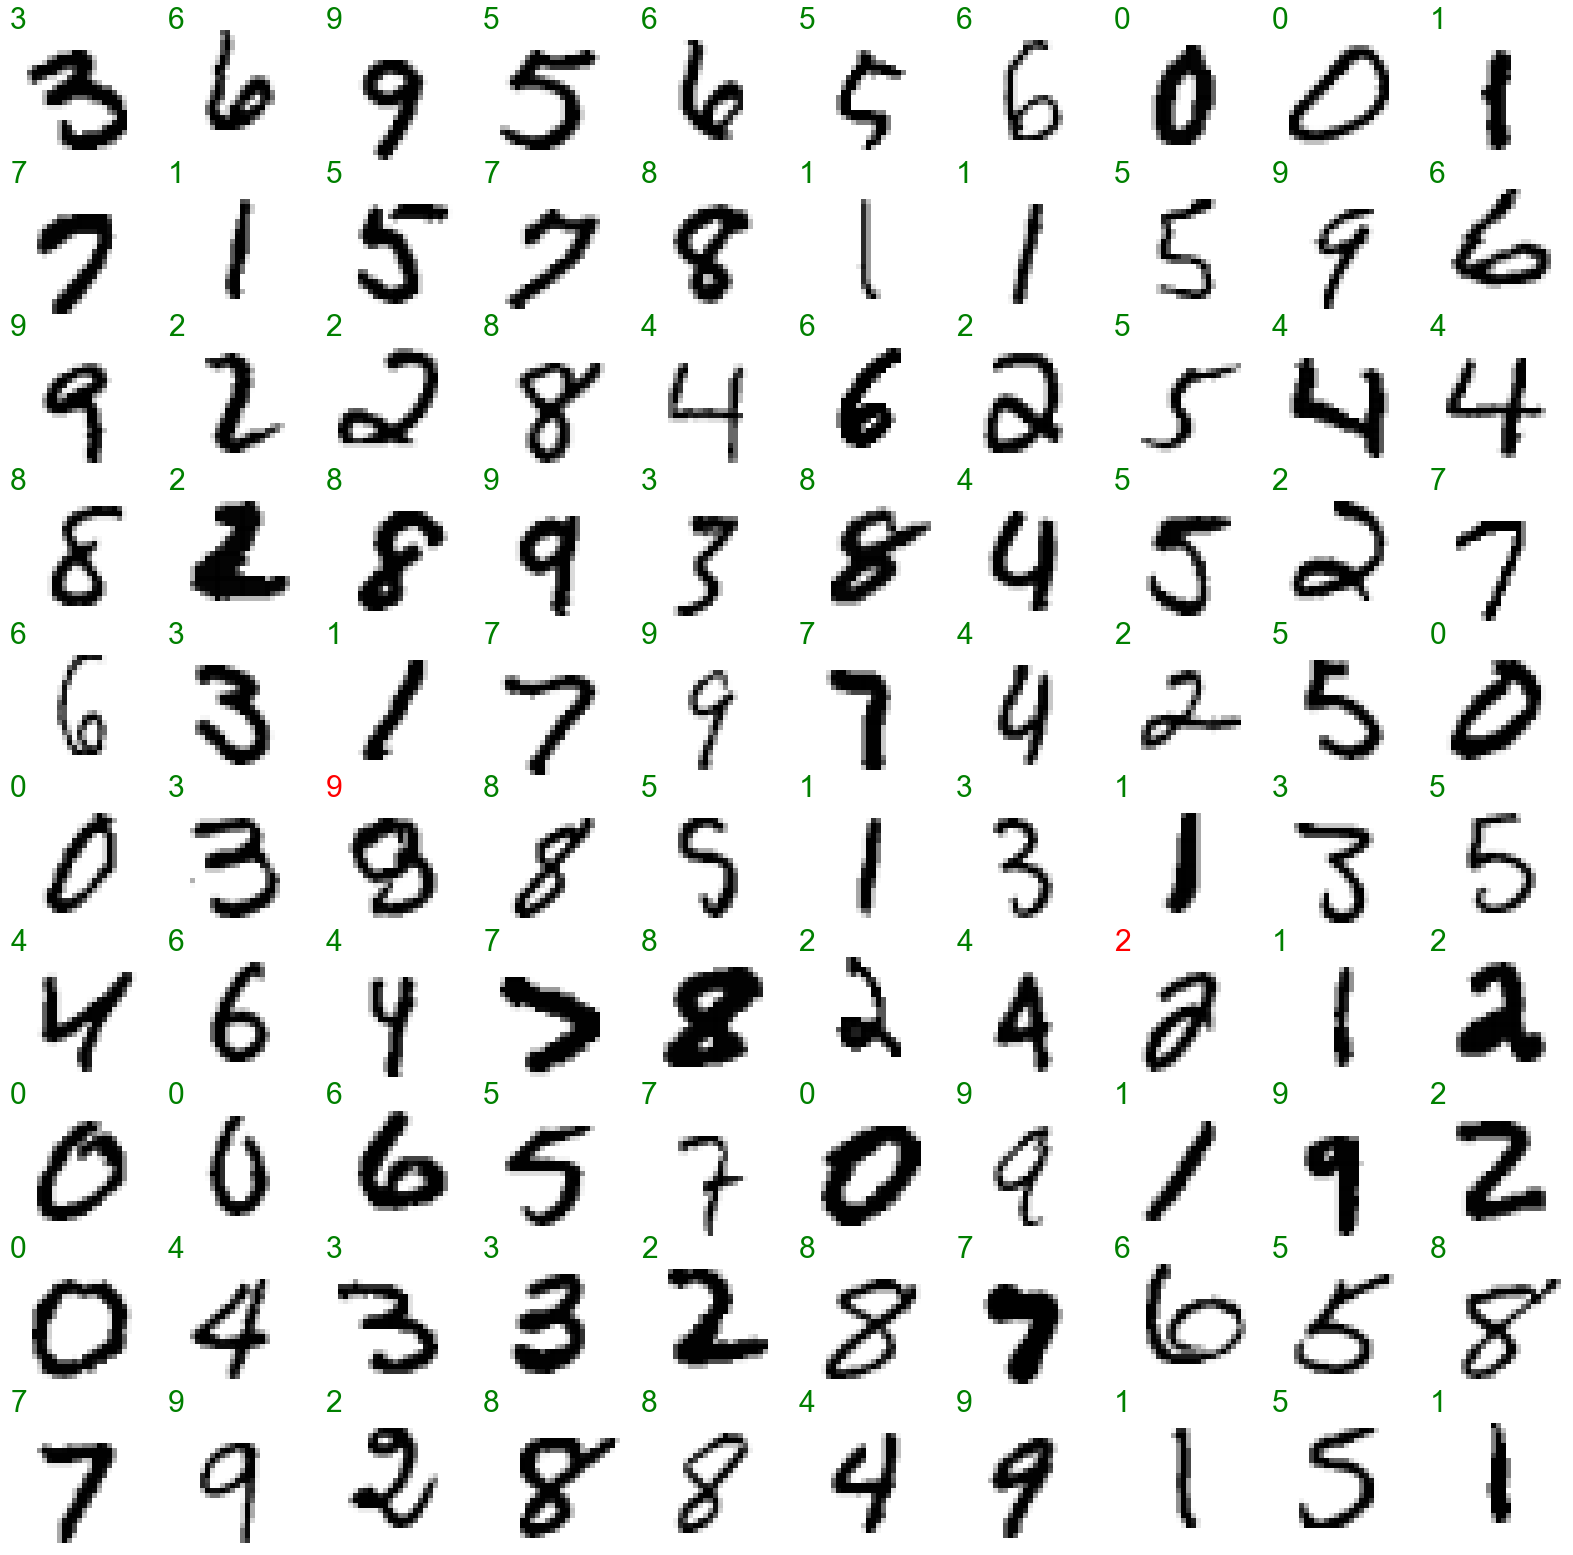

In [11]:
# 手寫圖像顯示分類正確與錯誤
fig ,axes = plt.subplots(10,10,figsize=(28,28),subplot_kw={"xticks":[],"yticks":[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i ,ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(28,28),cmap="binary",interpolation="nearest")
    ax.text(0.1,0.1,int(ytest[i]),color="green" if ytest[i]==pred1[i] else "red",fontsize=30)

Text(89.18, 0.5, 'true value')

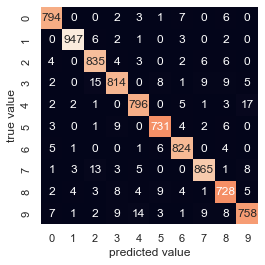

In [12]:
# ytest的混淆矩陣
mat = confusion_matrix(ytest,pred1)
sns.heatmap(mat, square=True,annot=True,cbar=False,fmt="d")
plt.xlabel("predicted value")
plt.ylabel("true value")

In [13]:
# 把 test data 套入模型
model.fit(train_X,np.ravel(train_y))
pred = model.predict(test)
print("OOB score: {}".format((model.oob_score_).round(4)*100),"%")

OOB score: 96.21 %


In [ ]:
submission=pd.DataFrame({"ImageId":range(1,pred.shape[0] + 1),"Label":pred})
submission.to_csv('submission.csv', index=False)